# Classificação de Notícias Usando Redes Neurais Recorrentes (RNN)

## Setup

In [188]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from keras import layers, callbacks

## Carregamento dos Dados

In [189]:
vocab_size = 10000

(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=vocab_size)
print(f'Formato do conjunto de treinamento: {x_train.shape}')
print(f'Formato do conjunto de teste: {x_test.shape}')

num_classes = np.max(y_train) + 1
print(f'Número de classes: {num_classes}')

Formato do conjunto de treinamento: (8982,)
Formato do conjunto de teste: (2246,)
Número de classes: 46


## Pré-Processamento: Transformação

In [190]:
max_len = 500

# pad sequences to the same length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)
print(f'Formato do conjunto de treinamento: {x_train.shape}')
print(f'Formato do conjunto de teste: {x_test.shape}')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('O dataset já vem indexado e portanto não será necessário realizar o label encoding.')

Formato do conjunto de treinamento: (8982, 500)
Formato do conjunto de teste: (2246, 500)
O dataset já vem indexado e portanto não será necessário realizar o label encoding.


## Topologia da Rede RNN

In [191]:
rnn = keras.Sequential(
    [
        layers.Embedding(input_dim=vocab_size, output_dim=128),
        layers.SimpleRNN(
            units=64,
            kernel_regularizer=keras.regularizers.l2(0.001),
            recurrent_regularizer=keras.regularizers.l2(0.001),
            dropout=0.2,
            #recurrent_dropout=0.2,
            return_sequences=False # return sequences for stacking RNN layers
        ),
        # layers.SimpleRNN(
        #     units=32,
        #     kernel_regularizer=keras.regularizers.l2(0.001),
        #     recurrent_regularizer=keras.regularizers.l2(0.001),
        #     dropout=0.2,
        #     recurrent_dropout=0.2
        # ),
        # layers.Dense(units=100, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.Dense(units=num_classes, activation='softmax')
    ]
)

rnn.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_29 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_35 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Compilação da RNN

In [192]:
rnn.compile(optimizer=keras.optimizers.Adam(),
            loss=keras.losses.CategoricalCrossentropy(),
            metrics=[keras.metrics.CategoricalAccuracy(name='acc')])

## Treinamento da RNN

In [193]:
earlyStopping = callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = rnn.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1, callbacks=[earlyStopping])

test_loss, test_acc = rnn.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - acc: 0.3708 - loss: 2.6985 - val_acc: 0.3537 - val_loss: 2.6018
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - acc: 0.3846 - loss: 2.4972 - val_acc: 0.3904 - val_loss: 2.5204
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - acc: 0.4620 - loss: 2.2903 - val_acc: 0.4616 - val_loss: 2.2933
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - acc: 0.4808 - loss: 2.1808 - val_acc: 0.4627 - val_loss: 2.2607
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - acc: 0.4929 - loss: 2.1111 - val_acc: 0.4783 - val_loss: 2.2016
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - acc: 0.4897 - loss: 2.1375 - val_acc: 0.4739 - val_loss: 2.1748
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - acc: 0.5143 - loss: 2.0079 - val_acc: 0.4772 - val_loss: 2.1627
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - acc: 0.5436 - loss: 1.8965 - val_acc: 0.5239 - val_loss: 2.0059
Epoch 9/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 

## Avaliação de Resultados

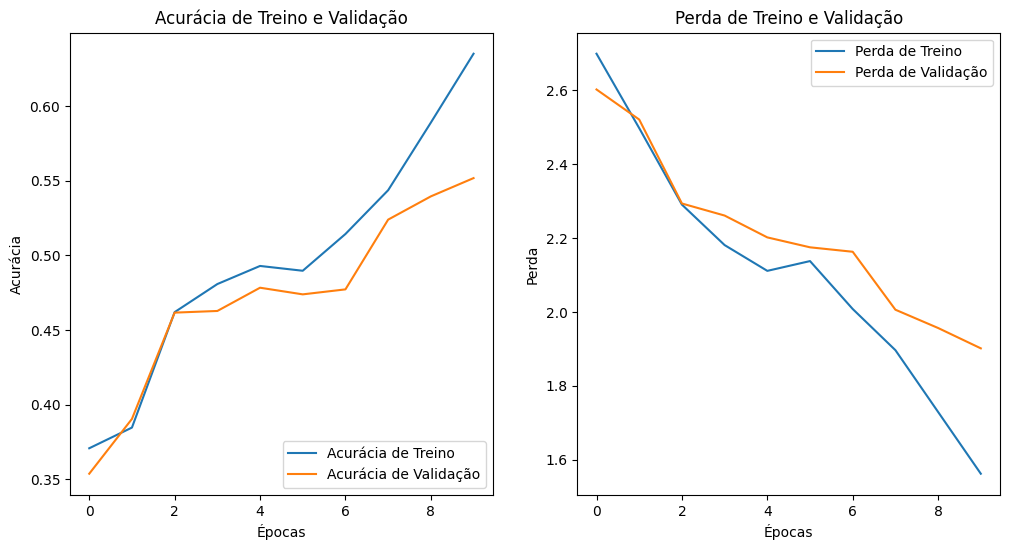

In [194]:
# Resgatar o histórico de acurácia e perda
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

# Criar a figura com os dois gráficos
plt.figure(figsize=(12, 6))

# Gráfico da Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Acurácia de Treino')
plt.plot(epochs_range, val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.title('Acurácia de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

# Gráfico da Perda (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perda de Treino')
plt.plot(epochs_range, val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')

plt.show()